In [ ]:
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

In [1]:
for train_index, test_index in kf.split(X):
 print(“TRAIN:”, train_index, “TEST:”, test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]
('TRAIN:', array([2, 3]), 'TEST:', array([0, 1]))
('TRAIN:', array([0, 1]), 'TEST:', array([2, 3]))

SyntaxError: invalid character in identifier (<ipython-input-1-3a5ab08e0c38>, line 2)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from math import sqrt



In [2]:
from haversine import haversine

In [3]:
df = pd.read_csv('house_data_cleaned.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,bed_bath_sum,renovation_yes,sqft_living_plus_lot,sqft_living_plus_lot_15,lat_long,distance_from_flatiron
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,47.5112,-122.257,1340,5650,4.00,0,6830,6990,"(47.5112, -122.257)",7.714868
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,47.7210,-122.319,1690,7639,5.25,1,9812,9329,"(47.721, -122.319)",7.766476
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,47.7379,-122.233,2720,8062,3.00,0,10770,10782,"(47.7379, -122.233)",10.107949
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,47.5208,-122.393,1360,5000,7.00,0,6960,6360,"(47.5208, -122.393)",6.655340
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,47.6168,-122.045,1800,7503,5.00,0,9760,9303,"(47.6168, -122.045)",13.578402


## lat,long tranformation into something useful
- after installing the haversine module, i want to explore how to use it to give us a distance from our building here in downtown. By doing so, it will allow us to check my hypothesis that homes closer to seattle are more expensive.

In [7]:

df['lat_long'] = tuple(zip(df.lat,df.long))


In [8]:
df['lat_long'].head()

0    (47.5112, -122.257)
1     (47.721, -122.319)
2    (47.7379, -122.233)
3    (47.5208, -122.393)
4    (47.6168, -122.045)
Name: lat_long, dtype: object

In [9]:
flatiron_latlong = [47.6092,-122.3363]
type(flatiron_latlong)

list

In [10]:
l = []
for i in df['lat_long']:
    l.append(haversine((flatiron_latlong),(i),unit = 'mi'))
l[:5]

[7.714867719017808,
 7.766476387009191,
 10.10794922047676,
 6.655340065489545,
 13.578402374482105]

In [11]:
df['distance_from_flatiron'] = pd.Series(l)


In [12]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,bed_bath_sum,renovation_yes,sqft_living_plus_lot,sqft_living_plus_lot_15,lat_long,distance_from_flatiron
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,47.5112,-122.257,1340,5650,4.00,0,6830,6990,"(47.5112, -122.257)",7.714868
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,47.7210,-122.319,1690,7639,5.25,1,9812,9329,"(47.721, -122.319)",7.766476
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,47.7379,-122.233,2720,8062,3.00,0,10770,10782,"(47.7379, -122.233)",10.107949
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,47.5208,-122.393,1360,5000,7.00,0,6960,6360,"(47.5208, -122.393)",6.655340
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,47.6168,-122.045,1800,7503,5.00,0,9760,9303,"(47.6168, -122.045)",13.578402


In [8]:
df7 = df[['price','sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view','distance_from_flatiron']]

In [16]:
abs(df7.corr()) >.60


,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,distance_from_flatiron
price,True,True,True,True,False,False,False,False
sqft_living,True,True,True,True,True,True,False,False
grade,True,True,True,True,True,True,False,False
sqft_above,True,True,True,True,True,True,False,False
sqft_living15,False,True,True,True,True,False,False,False
bathrooms,False,True,True,True,False,True,False,False
view,False,False,False,False,False,False,True,False
distance_from_flatiron,False,False,False,False,False,False,False,True


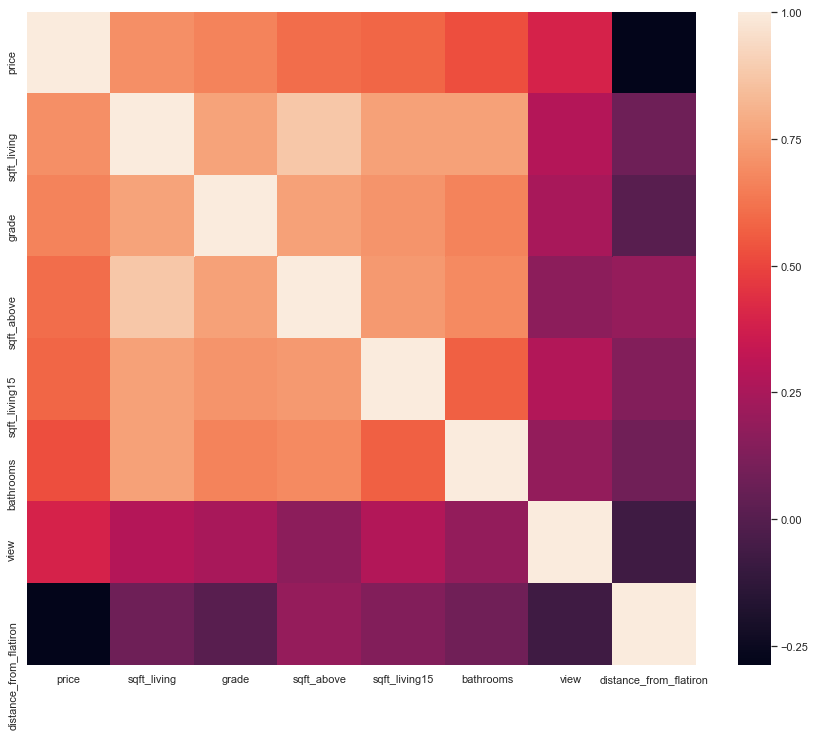

In [10]:
sns.set(rc={'figure.figsize': (15,12)})
sns.heatmap(df7.corr());

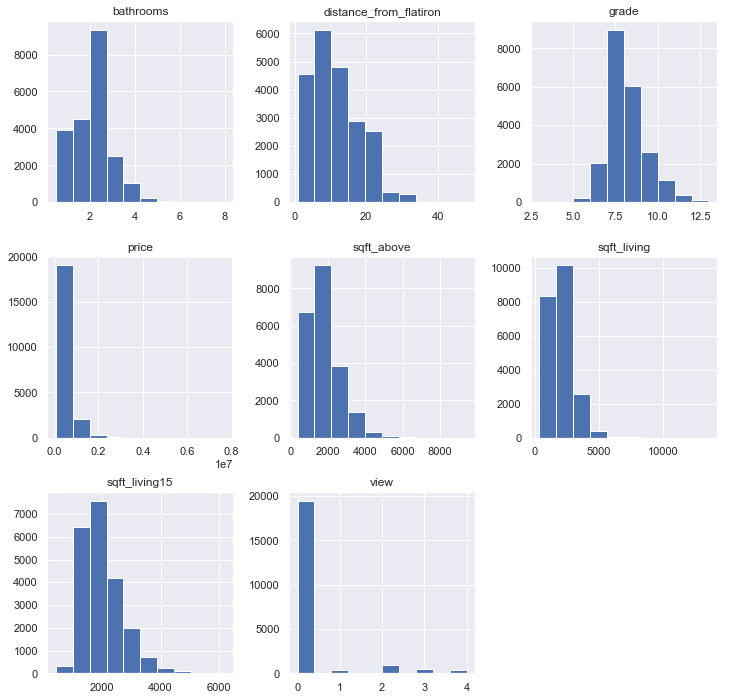

In [11]:
df7.hist(figsize=[12,12]);

/Users/krex/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


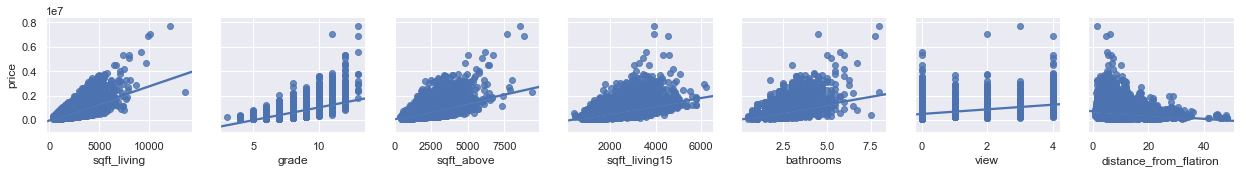

In [13]:
sns.pairplot(, x_vars=['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view','distance_from_flatiron'],
             y_vars="price",kind = 'reg');

In [17]:
X1 = df6[['sqft_living', 'grade', 'sqft_living15', 'bathrooms',
       'view','distance_from_flatiron']]
y = df6['price']

In [18]:
predictors = np.asarray(X1) #set predictors as numpy array of capital X
predictors_int = sm.add_constant(predictors) #.add_constant
model = sm.OLS(y,predictors_int).fit() #statsmodels.OrdinaryLeastSquares (dependent var, array of predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     7320.
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:42:55   Log-Likelihood:            -2.9540e+05
No. Observations:               21597   AIC:                         5.908e+05
Df Residuals:                   21590   BIC:                         5.909e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.952e+05   1.18e+04    -25.118      0.000   -3.18e+05   -2.72e+05
x1           182.1824      3.161     57.628      0.000     175.986     188.379
x2          7.629e+04   2072.595     36.809      0.000    7.22e+04    8.04e+04
x3            44.3336      3.459     12.817      0.000      37.554      51.114
x4         -1.481e+04   2935.085     -5.046      0.000   -2.06e+04   -9056.519
x5          7.844e+04   1981.959     39.576      0.000    7.46e+04    8.23e+04
x6         -1.753e+04    220.066    -79.643      0.000    -1.8e+04   -1.71e+04
==============================================================================
Omnibus:                    19438.718   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2182610.534
Skew:                           3.893   Prob(JB):                         0.00
Kurtosis:                      51.630   Cond. No.                     2.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
""" Now using Sklearn"""
ss = StandardScaler()

X1_scaled = ss.fit_transform(X1)

np.random.seed(33)

X1_train,X1_test,Y_train,Y_test = train_test_split(X1_scaled,y)

/Users/krex/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/krex/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [20]:
lr = LinearRegression()
lr.fit(X1_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
lr.score(X1_test,Y_test) #r**2 value

0.674215535229337

In [22]:
lr.coef_

array([ 160769.50957906,   92099.30409597,   35116.938874  ,
        -13234.10106397,   56081.11364303, -117468.43898583])

In [23]:
r_2 = metrics.r2_score(Y_test, lr.predict(X1_test))
vif = 1/(1-r_2)
mae = metrics.mean_absolute_error(Y_test, lr.predict(X1_test))
mse = metrics.mean_squared_error(Y_test, lr.predict(X1_test))

In [24]:
#PRICE vs. TOP 6 BENCHMARK #test size is .25
print(f'Our list of predictors: {X1.columns}')
print(f"The R-squared score of our test is {r_2}")
print(f"The MAE score of our test is {mae}")
print(f"The MSE score of our test is {mse}")
print(f"The RMSE score of our test is ${sqrt(mse)}")

Our list of predictors: Index(['sqft_living', 'grade', 'sqft_living15', 'bathrooms', 'view',
       'distance_from_flatiron'],
      dtype='object')
The R-squared score of our test is 0.674215535229337
The MAE score of our test is 132024.28339846162
The MSE score of our test is 47299654295.065
The RMSE score of our test is $217484.83693137093
